## Metric Design 

### Introduction

In this exercice we are going to define a set of output and input metrics that will be relevant for the rest of our analysis. 

### Exercices

Frequency 

- What's the frequency of `review_score` from table `olist_order_reviews_dataset`?
- What's the frequency of `order_status` from the table `olist_orders_dataset`?
- In which state are sellers mostly located? What about customers?

Metrics 
- Which metric would you use as the output metric of Olist? 
- Which metric would you use to measure that a customer had a good experience with Olist? 
- Which metric would you use to measure shipping delay?
- For each metric, plot a trend line over time.

### 1 - Frequency 

In [22]:
#load modules 

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#load data
%load_ext autoreload
%autoreload 2

from olist.data import Olist

olist = Olist()
data = olist.get_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
data.keys()

dict_keys(['olist_sellers_dataset', 'product_category_name_translation', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_customers_dataset', 'olist_geolocation_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset'])

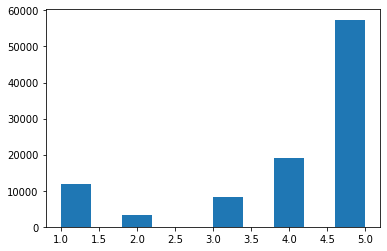

In [25]:
#Plot a histogram of review_score 
plt.hist(data['olist_order_reviews_dataset'].review_score);

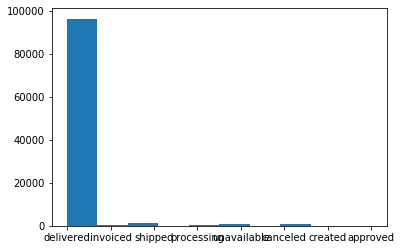

In [26]:
#Plot histogram of order_status
plt.hist(data['olist_orders_dataset'].order_status);

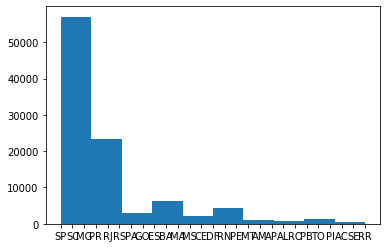

In [27]:
#Plot histogram of seller states
plt.hist(data['olist_customers_dataset'].customer_state);

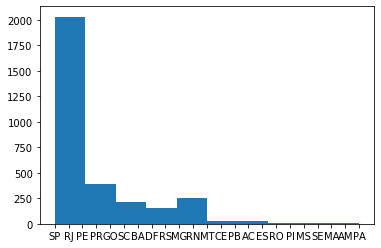

In [28]:
#Plot histogram of customers states
plt.hist(data['olist_sellers_dataset'].seller_state);

## 2 - Metrics

#### Ouptut metric

(array([1.10685e+05, 1.51600e+03, 3.26000e+02, 7.70000e+01, 2.70000e+01,
        1.00000e+01, 5.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([8.500000e-01, 6.742650e+02, 1.347680e+03, 2.021095e+03,
        2.694510e+03, 3.367925e+03, 4.041340e+03, 4.714755e+03,
        5.388170e+03, 6.061585e+03, 6.735000e+03]),
 <a list of 10 Patch objects>)

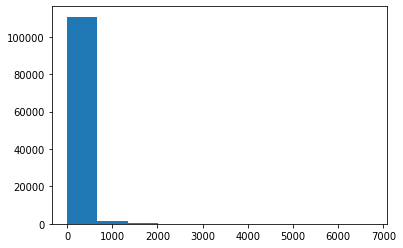

In [29]:
#Plot output metric 
plt.hist(data['olist_order_items_dataset'].price)

In [30]:
#handle datetime
list_date_col = ['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']
orders_df = data['olist_orders_dataset'].copy()
for column in list_date_col:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()
#plot numbers of monthly orders purchased

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [31]:
orders_df['year_delivery'] = orders_df.order_delivered_customer_date.dt.year
orders_df['month_delivery'] = orders_df.order_delivered_customer_date.dt.month
orders_values_df = orders_df.merge(right=data['olist_order_payments_dataset'], how='left')
orders_values_df = orders_values_df.set_index('order_delivered_customer_date')
orders_values_df = orders_values_df[orders_values_df.order_status=='delivered']
monthly_orders_values_df = pd.DataFrame(orders_values_df.groupby(['year_delivery','month_delivery']).payment_value.sum())

In [32]:
monthly_orders_values_df

payment_value
year_delivery month_delivery               
2016.0        10.0                 34438.41
              11.0                 11187.07
              12.0                   960.85
2017.0        1.0                  38708.63
              2.0                 228152.25
              3.0                 387275.32
              4.0                 307722.84
              5.0                 600917.76
              6.0                 502197.97
              7.0                 531271.71
              8.0                 627367.19
              9.0                 670205.77
              10.0                759903.98
              11.0                754862.96
              12.0               1102232.62
2018.0        1.0                 993588.74
              2.0                 875514.19
              3.0                1043754.61
              4.0                1300791.67
              5.0                1170501.14
              6.0                1171086.67
              7.0                 948000.64
              8.0                1347216.73
              9.0                  12875.18
              10.0                   347.95

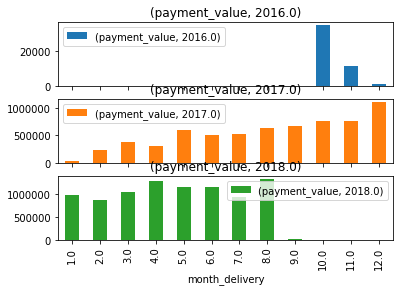

In [33]:
monthly_orders_values_df.unstack(level=0).plot(kind='bar', subplots=True);

In [34]:
orders_values_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,year_delivery,month_delivery,payment_sequential,payment_type,payment_installments,payment_value
order_delivered_customer_date,,,,,,,,,,,,,
2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-18,2017.0,10.0,1.0,credit_card,1.0,18.12
2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-18,2017.0,10.0,3.0,voucher,1.0,2.00
2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-18,2017.0,10.0,2.0,voucher,1.0,18.59
2018-08-07 15:27:45,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-13,2018.0,8.0,1.0,boleto,1.0,141.46
2018-08-17 18:06:29,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-09-04,2018.0,8.0,1.0,credit_card,3.0,179.12


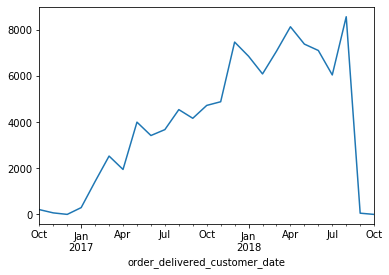

In [35]:
orders_values_df.resample('M')['order_id'].count().plot()

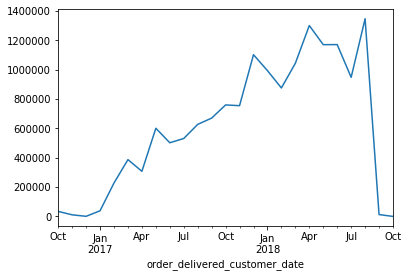

In [36]:
#Plus simple que précédent
orders_values_df.resample('M')['payment_value'].sum().plot()

#### Customer Satisfaction

In [37]:
#Plot customer satisfaction

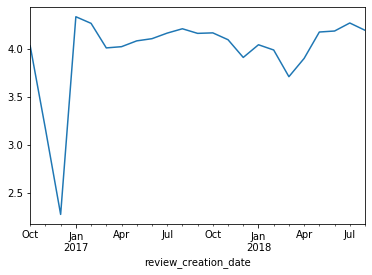

In [38]:
#handle datetime
reviews_df = data['olist_order_reviews_dataset']
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'])
reviews_df = reviews_df.set_index(['review_creation_date'])
reviews_df.resample('M')['review_score'].mean().plot()

#### Shipping delay

In [39]:
#Load orders

In [40]:
#Handle datetime

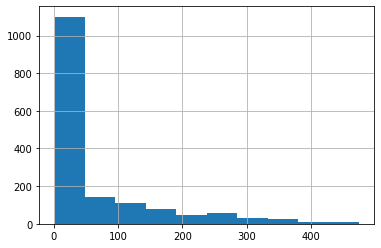

In [58]:
#Plot distribution of wait_time and delay_vs_expected
orders_df['wait_time'] = orders_df.order_delivered_customer_date-orders_df.order_purchase_timestamp
orders_df['wait_time'] = orders_df['wait_time'].astype('timedelta64[h]')
orders_df.groupby(['wait_time']).wait_time.count().hist()